In [293]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import exploration_modules as expo
import importlib
# 
importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)
importlib.reload(expo)

<module 'exploration_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\exploration_modules.py'>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
# set configuration
sample_size, nr_sample_sets, nr_moments = 100, 30, 10
n_folds = 5
test_size = 0.2

## Bounded distributions

### same number of elements

In [294]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample_sets, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [295]:
moments_df = dem.get_moments(bounded_samples, nr_moments)
moments_df.head(3)

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,label
0,0.320220,0.057638,0.008811,0.008488,0.003066,0.001929,0.000933,0.000532,0.000284,0.000160,beta_1_2
1,0.320307,0.053861,0.005825,0.005708,0.001405,0.000855,0.000301,0.000155,0.000064,0.000031,beta_1_2
2,0.310869,0.045293,0.008445,0.006562,0.002707,0.001653,0.000894,0.000538,0.000319,0.000196,beta_1_2


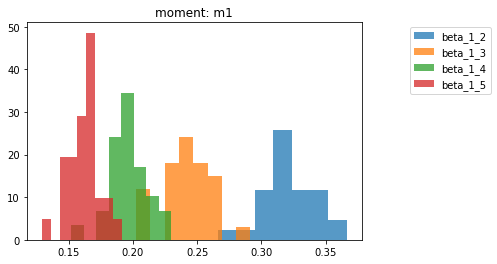

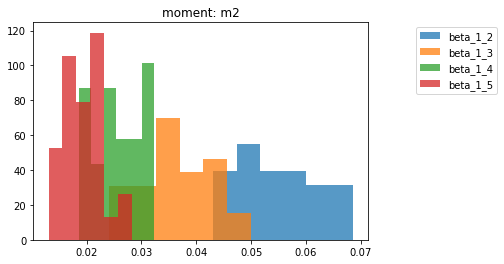

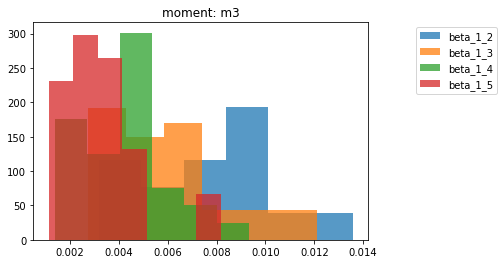

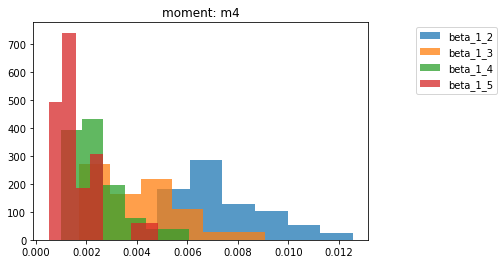

In [51]:
dem.get_histogram_of_moments(moments_df)

#### SVM

In [285]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
nr_moments_list = np.arange(2,21)

##### version 1

In [12]:
res_svm = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets, n_folds, test_size, 1)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

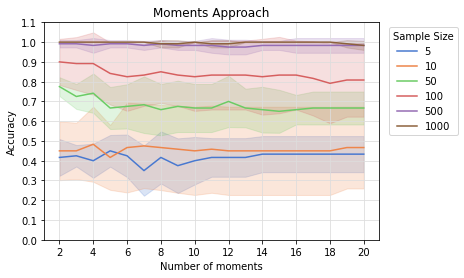

In [13]:
cm.plot_cv_moments(res_svm)

##### version 2

In [286]:
cost = [0.01, 0.25, 1, 5, 10]
gamma = [0.01, 0.25, 1, 5, 10]

In [296]:
res_svm_v2 = cm.cv_samplesize_moments_svm(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets, n_folds, test_size, cost, gamma)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

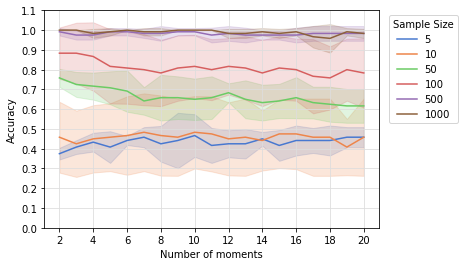

In [297]:
cm.plot_cv_moments_v2(res_svm_v2)

In [97]:
res_svm.to_csv('results/moments/res_svm_bounded.csv')
res_svm_v2.to_csv('results/moments/res_svm_bounded_v2.csv')

#### Logistic Regression

##### version 1

In [26]:
res_lr = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets, n_folds, test_size, 2)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

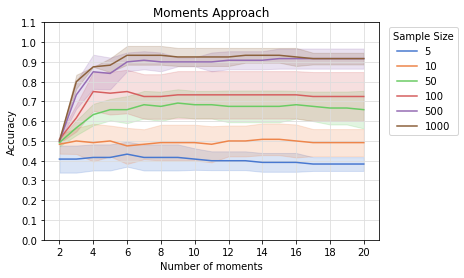

In [27]:
cm.plot_cv_moments(res_lr)

##### version 2

In [290]:
C = [0.01, 0.25, 1, 5, 10]

In [289]:
res_lr_v2 = cm.cv_samplesize_moments_lr(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets, n_folds, test_size, C)

NameError: name 'C' is not defined

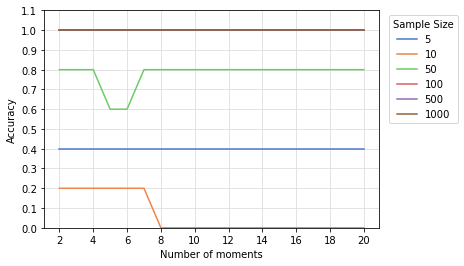

In [177]:
cm.plot_cv_moments_v2(res_lr_v2)

In [41]:
res_lr.to_csv('results/moments/res_lr_bounded.csv')

### Varying number of elements

#### SVM

In [30]:
res_svm_flex = cm.cv_samplesize_moments_flex(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets, n_folds, test_size, 1)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

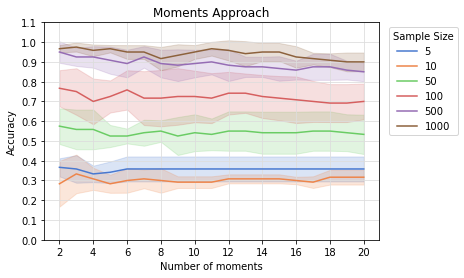

In [31]:
cm.plot_cv_moments(res_svm_flex)

#### Logistic regression

In [58]:
res_svm_flex_lr = cm.cv_samplesize_moments_flex(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets, n_folds, test_size, 2)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

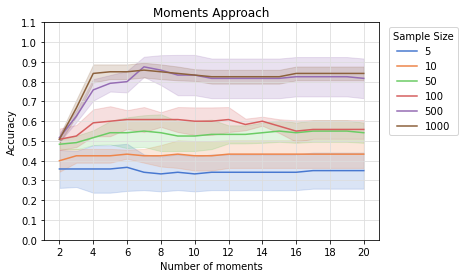

In [59]:
cm.plot_cv_moments(res_svm_flex_lr)

### Heavytail distributions

In [19]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample_sets, sample_size, transform = True)
#dm.plot_histograms_of_samples(heavytail_samples)

In [20]:
nr_moments=10
moments_df = dem.get_moments(heavytail_samples, nr_moments)
moments_df.head(3)

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,label
0,0.856877,0.552635,0.748622,2.125040,5.403208,15.071385,42.571253,122.847375,358.836857,1059.227915,cauchy
1,0.751252,0.339962,0.267032,0.698255,1.472459,3.699299,9.373294,24.346420,63.687560,167.447454,cauchy
2,0.961129,0.651867,0.673340,1.947710,4.503151,12.425193,34.745404,101.215808,300.172198,903.644430,cauchy


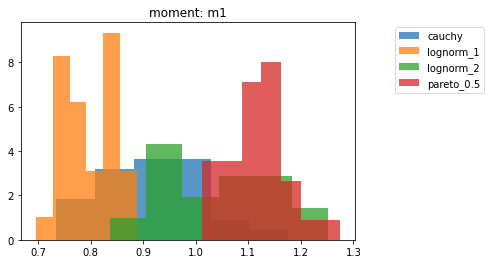

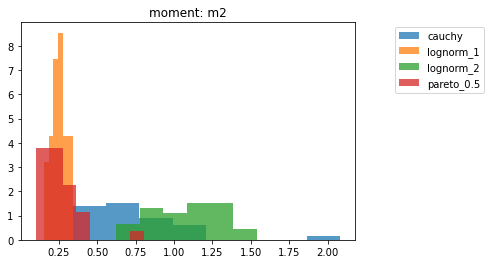

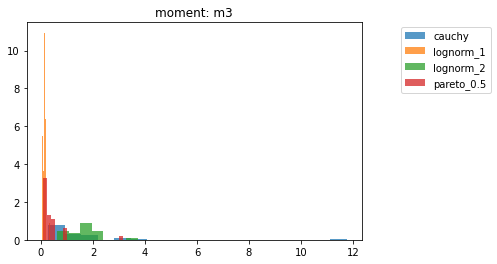

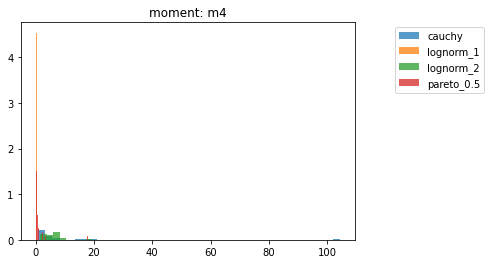

In [206]:
dem.get_histogram_of_moments(moments_df)

#### SVM

In [36]:
res_svm_ht = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, heavytail_dists, nr_sample_sets, n_folds, test_size, 1, transform = True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

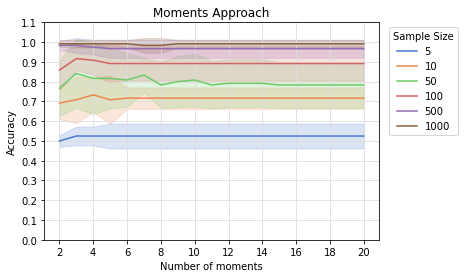

In [37]:
cm.plot_cv_moments(res_svm_ht)

In [291]:
res_svm_ht_v2 = cm.cv_samplesize_moments_svm(sample_size_list, nr_moments_list, heavytail_dists, nr_sample_sets, n_folds, test_size, cost, gamma,transform=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

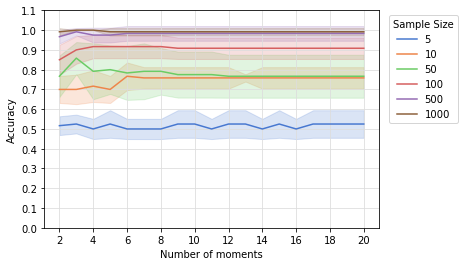

In [292]:
cm.plot_cv_moments_v2(res_svm_ht_v2)

#### Logistic Regression

In [60]:
res_lr_ht = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, heavytail_dists, nr_sample_sets, n_folds, test_size, 2, transform=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

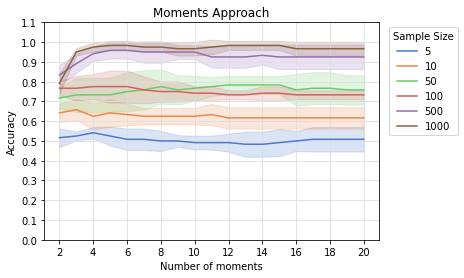

In [61]:
cm.plot_cv_moments(res_lr_ht)

In [45]:
res_svm_ht.to_csv('results/moments/res_svm_heavytail.csv')
res_lr_ht.to_csv('results/moments/res_lr_heavytail.csv')

### Multi-modal

In [202]:
nr_modes = 5
nr_sample_sets = 20
nr_mm_dist = 10
sample_size=50

In [203]:
mm_df= dm.get_multimodal_dists(nr_mm_dist, nr_sample_sets, nr_modes, sample_size)
moments_df = dem.get_moments(mm_df, 10)
moments_df.head(5)

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,label
0,6.098358,3.995791,-7.750815,55.577502,-217.306361,1178.626020,-5496.930075,28188.615835,-138393.239757,7.007391e+05,Dist 1
1,6.097224,4.181849,-7.497154,64.422037,-264.352344,1586.332394,-7987.931918,44662.519503,-238062.809596,1.310982e+06,Dist 1
2,6.025229,3.769177,-8.278144,61.132515,-255.793844,1444.585658,-7052.037723,37638.457513,-192327.208116,1.012634e+06,Dist 1
3,6.065543,3.555600,-6.627241,44.385262,-163.237251,844.895820,-3735.950670,18424.793017,-86544.036065,4.226417e+05,Dist 1
4,6.250112,4.266174,-8.607125,70.656702,-312.459017,1945.909639,-10713.083771,64916.581821,-385625.677170,2.362324e+06,Dist 1


#### SVM

In [73]:
res_svm_mm = cm.cv_samplesize_moments_mm(sample_size_list, nr_moments_list, nr_sample_sets, nr_mm_dist, nr_modes, n_folds, test_size, 1)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

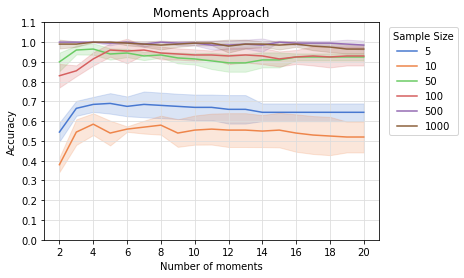

In [74]:
cm.plot_cv_moments(res_svm_mm)

#### Logistic Regression

In [70]:
res_lr_mm = cm.cv_samplesize_moments_mm(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets, n_folds, test_size, 2)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

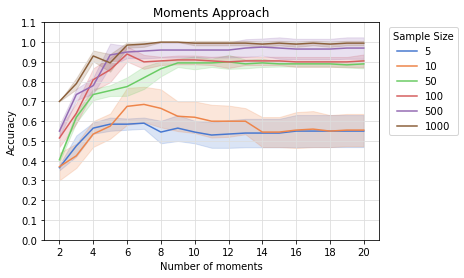

In [71]:
cm.plot_cv_moments(res_lr_mm)

# figures for report

In [206]:
cost = [0.01,0.1, 0.5, 1, 5, 10]
gamma = [0.01, 0.1, 1, 5, 10]

In [193]:
#grid search svm
best_cost, best_gamma, result = cm.grid_search_svm(moments_df, 5, cost, gamma)

In [194]:
best_cost

1.0

In [195]:
best_gamma

1.0

In [196]:
res_agg = result.groupby(['cost','gamma'], as_index=False).agg({'cv_error':['mean','std']})
res_agg.columns = ['cost','gamma','mean','std']
res_agg['se']=res_agg['std']/np.sqrt(5)

In [197]:
res_agg

,cost,gamma,mean,std,se
0,0.01,0.01,1.394949,0.007788,0.003483
1,0.01,0.10,1.403718,0.002611,0.001168
2,0.01,1.00,1.411417,0.007383,0.003302
3,0.01,5.00,1.404948,0.012996,0.005812
4,0.01,10.00,1.401456,0.007334,0.003280
5,0.10,0.01,1.409087,0.029421,0.013157
6,0.10,0.10,0.658238,0.057206,0.025583
7,0.10,1.00,0.490962,0.112717,0.050409
8,0.10,5.00,0.635945,0.073010,0.032651
9,0.10,10.00,0.915965,0.194551,0.087006


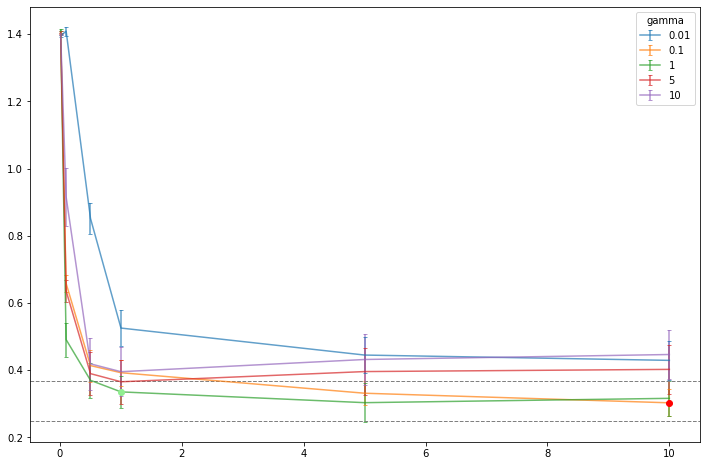

In [198]:
plt.figure(figsize=(12, 8))
for i in range(len(gamma)):
    data = res_agg.loc[res_agg['gamma']==gamma[i]]
    plt.errorbar(x=data['cost'], y=data['mean'], yerr=data['se'], label=gamma[i], capsize=2, alpha=0.7)
    
#sns.scatterplot(x=10, y=0, color='black')
plt.axhline(y=threshold_up, ls='--', color='grey',linewidth=1)
plt.axhline(y=threshold_down, ls='--', color='grey',linewidth=1)
plt.scatter([10], [0.302841], color='red', zorder=10)
plt.scatter([1], [0.335379], color='lightgreen', zorder=10)
plt.legend(title='gamma')
plt.title('')
plt.show()

In [199]:
result

,cv_error,cost,gamma
0,1.402339,0.01,0.01
1,1.402880,0.01,0.01
2,1.386294,0.01,0.01
3,1.395358,0.01,0.01
4,1.387875,0.01,0.01
...,...,...,...
145,0.282837,10.00,10.00
146,0.568103,10.00,10.00
147,0.323204,10.00,10.00
148,0.671087,10.00,10.00


In [238]:
res = cm.svm_model_m2(moments_df, n_folds, cost, gamma)
i = 2
j=3

In [261]:
a=pd.DataFrame()

In [258]:
d = dict(zip(['score','nr_moments','sample_size'],[res, j, i]))

In [259]:
d

{'score': array([0.6875, 0.5625, 0.625 , 0.875 , 0.75  ]),
 'nr_moments': 3,
 'sample_size': 2}

In [266]:
d_D =pd.DataFrame(d)

In [267]:
a.append(d_D)

,score,nr_moments,sample_size
0,0.6875,3,2
1,0.5625,3,2
2,0.6250,3,2
3,0.8750,3,2
4,0.7500,3,2


In [281]:
def cv_samplesize_moments_svm(sample_size_list, nr_moments_list, dists, nr_sample_sets, n_folds, test_size, cost_vector, gamma_vector, transform = False):
    result = pd.DataFrame()
    for i in tqdm(sample_size_list, desc='Completed'):
        samples = dm.get_samples(dists, nr_sample_sets, i, transform = transform)
        for j in nr_moments_list:
            moments_df = dem.get_moments(samples, j)
            score = cm.svm_model_m(moments_df, n_folds, cost_vector, gamma_vector)
            result_ = dict(zip(['score','nr_moments','sample_size'],[score, j, i]))
            result_df = pd.DataFrame(result_)
            result= result.append(result_df)
    return result

In [279]:
result = pd.DataFrame()
result.append(result_df)

,score,nr_moments,sample_size
0,0.708333,5,50
1,0.625000,5,50
2,0.791667,5,50
3,0.625000,5,50
4,0.750000,5,50


In [233]:
from tqdm.auto import tqdm

In [231]:
sample_size_list = [5, 10, 50]
nr_moments_list = np.arange(2,6)
cost = [0.01,0.1, 0.5, 1, 5, 10]
gamma = [0.01, 0.1, 1, 5, 10]

In [282]:
result = cv_samplesize_moments_svm(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets, n_folds, test_size, cost, gamma)

Completed:   0%|          | 0/3 [00:00<?, ?it/s]

In [283]:
result

,score,nr_moments,sample_size
0,0.375000,2,5
1,0.333333,2,5
2,0.416667,2,5
3,0.500000,2,5
4,0.375000,2,5
0,0.375000,3,5
1,0.333333,3,5
2,0.416667,3,5
3,0.375000,3,5
4,0.333333,3,5


In [277]:
for i in tqdm(sample_size_list, desc='Completed'):
    samples = dm.get_samples(bounded_dists, nr_sample_sets, i)
    for j in nr_moments_list:
        moments_df = dem.get_moments(samples, j)
        score = cm.svm_model_m(moments_df, n_folds, cost, gamma)
        result_ = dict(zip(['score','nr_moments','sample_size'],[score, j, i]))
        result_df = pd.DataFrame(result_)
        result.append(result_df)
        print(result_df)

Completed:   0%|          | 0/3 [00:00<?, ?it/s]

      score  nr_moments  sample_size
0  0.375000           2            5
1  0.333333           2            5
2  0.416667           2            5
3  0.500000           2            5
4  0.375000           2            5
      score  nr_moments  sample_size
0  0.375000           3            5
1  0.333333           3            5
2  0.416667           3            5
3  0.375000           3            5
4  0.333333           3            5
      score  nr_moments  sample_size
0  0.333333           4            5
1  0.333333           4            5
2  0.458333           4            5
3  0.416667           4            5
4  0.500000           4            5
      score  nr_moments  sample_size
0  0.291667           5            5
1  0.291667           5            5
2  0.458333           5            5
3  0.416667           5            5
4  0.416667           5            5
      score  nr_moments  sample_size
0  0.541667           2           10
1  0.583333           2           10
2